In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
diamonds = pd.read_csv("C:\\Users\\arshi\\OneDrive\\Desktop\\CSV\\diamonds.csv")


In [9]:
diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
label_encoders = {}
for column in ['cut', 'color', 'clarity']:
    label_encoders[column] = LabelEncoder()
    diamonds[column] = label_encoders[column].fit_transform(diamonds[column])

In [11]:
X = diamonds.drop(columns=['price'])
y = diamonds['price']

In [12]:
diamonds.describe()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


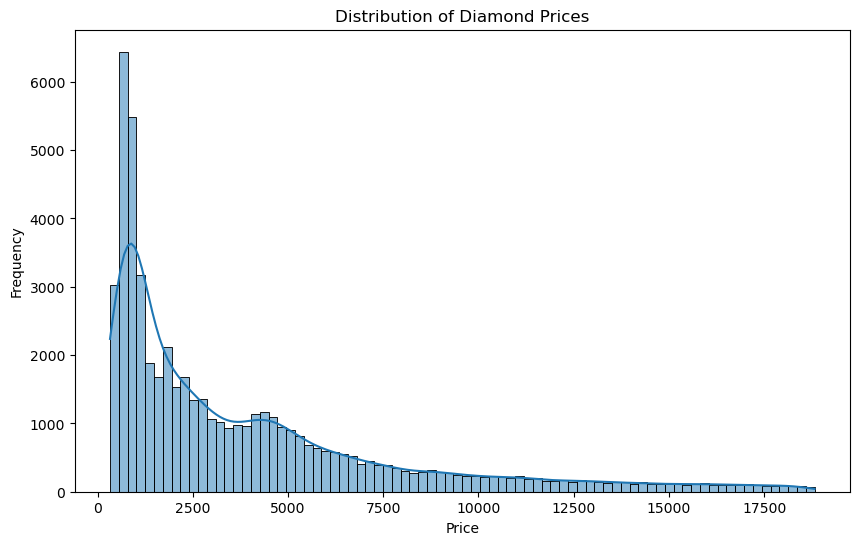

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['price'], kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

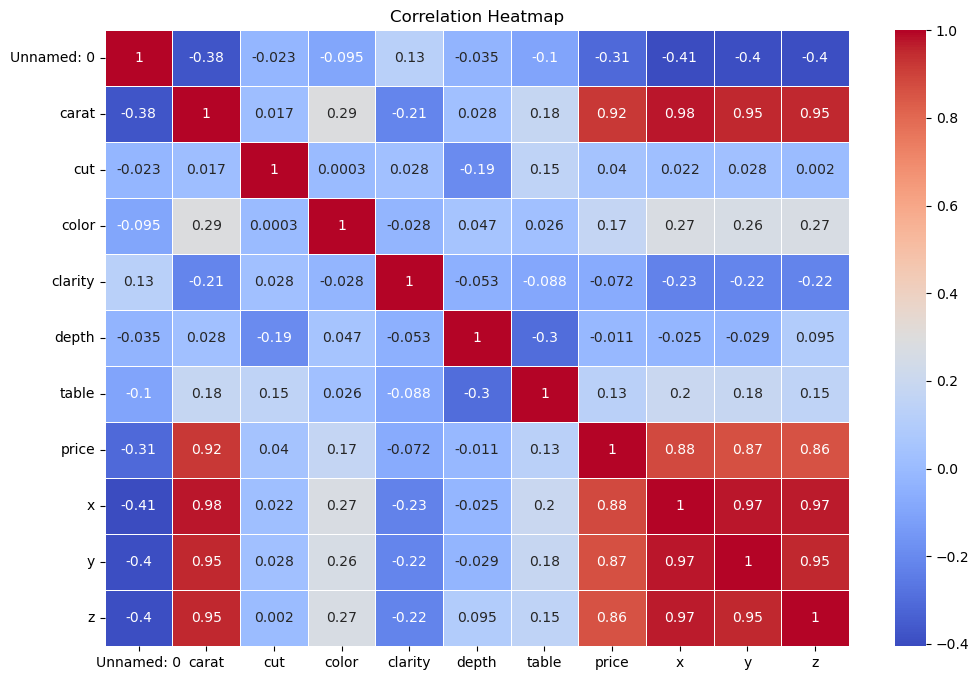

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(diamonds.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

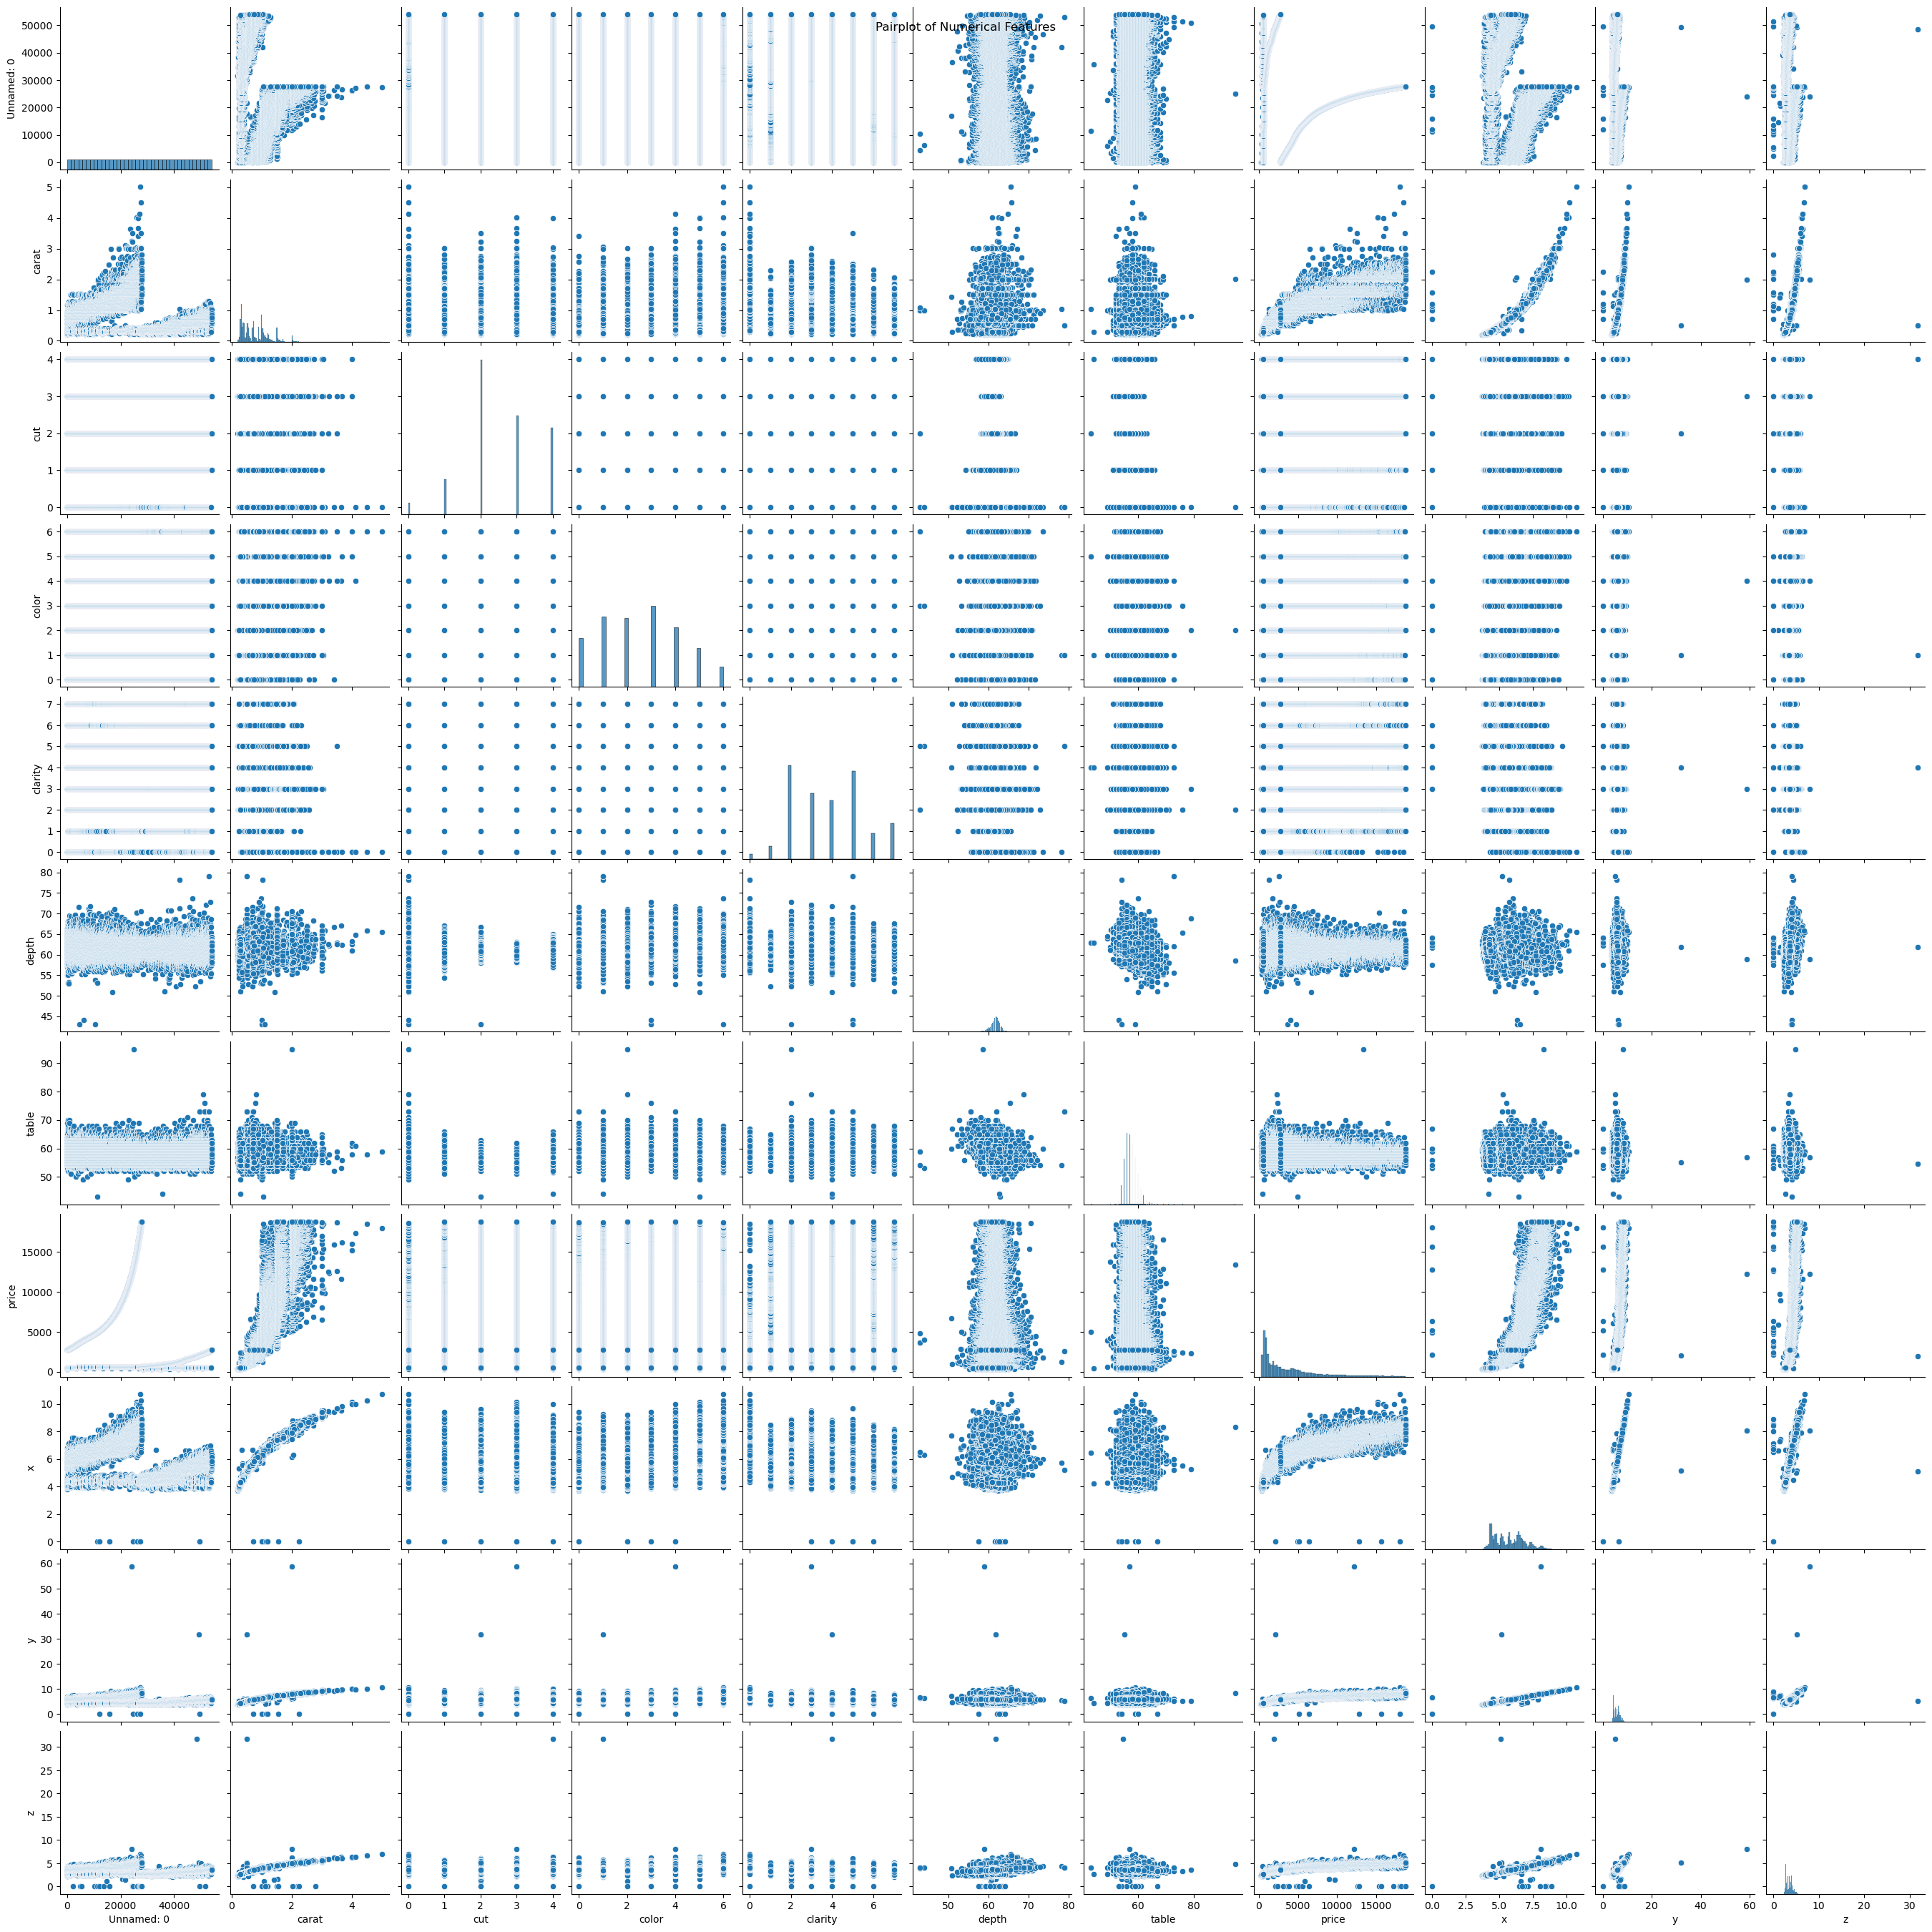

In [16]:
sns.pairplot(diamonds)
plt.suptitle("Pairplot of Numerical Features")
plt.show()

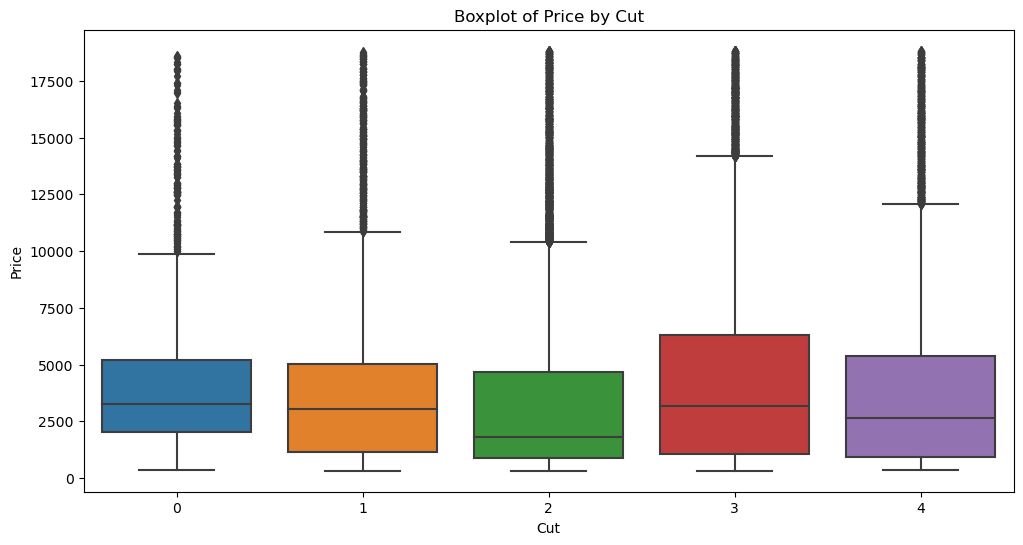

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=diamonds, x='cut', y='price')
plt.title("Boxplot of Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()


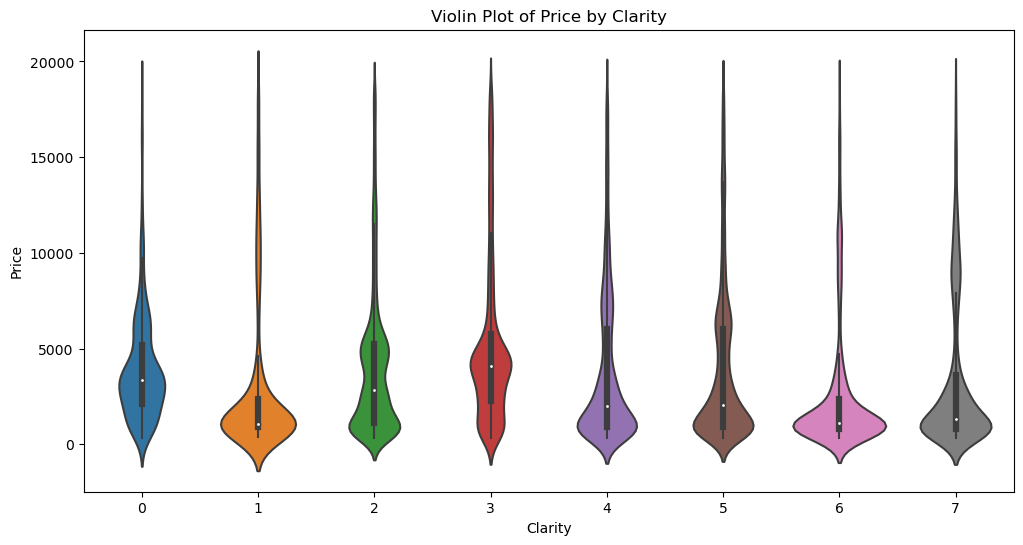

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=diamonds, x='clarity', y='price')
plt.title("Violin Plot of Price by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

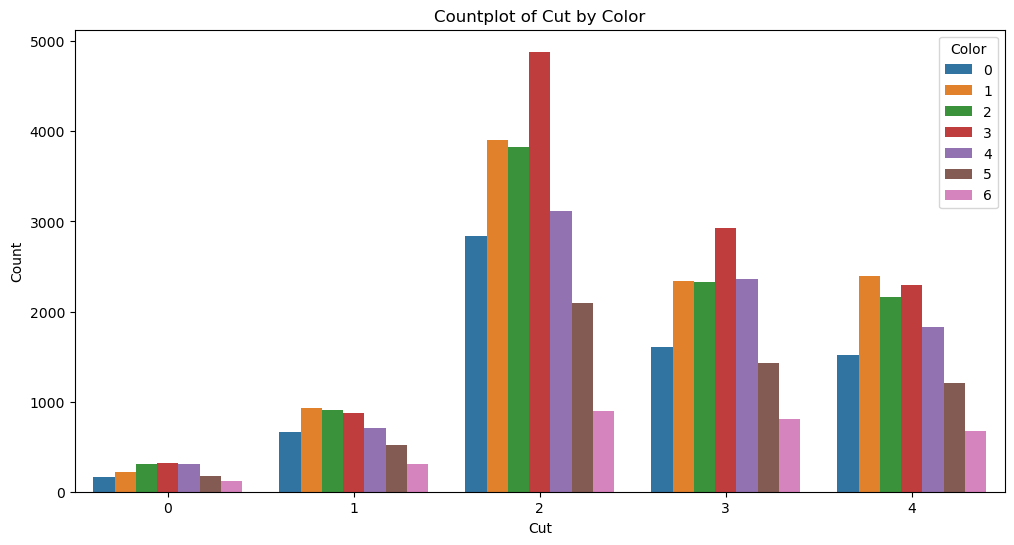

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=diamonds, x='cut', hue='color')
plt.title("Countplot of Cut by Color")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.legend(title='Color')
plt.show()

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [21]:
print("Linear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_pred))
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print("R-squared Score:", r2_score(y_test, lr_pred))


Linear Regression:
Mean Absolute Error: 862.9888776244621
Mean Squared Error: 1812024.0505481171
R-squared Score: 0.8860134363272641


In [22]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [24]:
print("\nRandom Forest Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("R-squared Score:", r2_score(y_test, rf_pred))


Random Forest Regression:
Mean Absolute Error: 2.7678253615127955
Mean Squared Error: 453.67140257693734
R-squared Score: 0.9999714615022904
